In [194]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
titanic_df = pd.read_csv("titanic (1).csv")
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [196]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [197]:
titanic_df['Age'] = titanic_df['Age'] .fillna(titanic_df['Age'].mean())

In [198]:
featurenames= titanic_df.columns

In [199]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [200]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
# Dropping other irrelevant variables
#Name,Embarked,ticket,fare, passengerid
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("Fare", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.head()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S

In [201]:
# # label encoder 'sex' for the scaler to work
# encode= LabelEncoder()
# encode.fit_transform("object")


In [202]:
# scaler= MinMaxScaler()
# scaled= scaler.fit_transform(titanic_df)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [203]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [204]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

Survived  Pclass   Age  SibSp  Parch Embarked  Sex_female  Sex_male
0         0       3  22.0      1      0        S       False      True
1         1       1  38.0      1      0        C        True     False
2         1       3  26.0      0      0        S        True     False
3         1       1  35.0      1      0        S        True     False
4         0       3  35.0      0      0        S       False      True

Now, we do the same to the "Embarked" column.

In [205]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

Survived  Pclass   Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C  \
0         0       3  22.0      1      0       False      True       False   
1         1       1  38.0      1      0        True     False        True   
2         1       3  26.0      0      0        True     False       False   
3         1       1  35.0      1      0        True     False       False   
4         0       3  35.0      0      0       False      True       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True

In [206]:

X= titanic_df.drop(columns=['Survived'])
y= titanic_df['Survived']
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X_train

Pclass        Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C  \
331       1  45.500000      0      0       False      True       False   
733       2  23.000000      0      0       False      True       False   
382       3  32.000000      0      0       False      True       False   
704       3  26.000000      1      0       False      True       False   
813       3   6.000000      4      2        True     False       False   
..      ...        ...    ...    ...         ...       ...         ...   
106       3  21.000000      0      0        True     False       False   
270       1  29.699118      0      0       False      True       False   
860       3  41.000000      2      0       False      True       False   
435       1  14.000000      1      2        True     False       False   
102       1  21.000000      0      1       False      True       False   

     Embarked_Q  Embarked_S  
331       False        True  
733       False        True  
382       False        True  
704       False        True  
813       False        True  
..          ...         ...  
106       False        True  
270       False        True  
860       False        True  
435       False        True  
102       False        True  

[712 rows x 9 columns]

In [207]:
unpruned= DecisionTreeClassifier(max_depth= None, random_state=42)
unpruned.fit(X_train,y_train)

#predicting test dataset
ytrainpred= unpruned.predict(X_train)
ytestpred= unpruned.predict(X_test)

#printing accuracies

print(f'training accuracy= {accuracy_score(y_train,ytrainpred)}')
print(f'testing accuracy= {accuracy_score(y_test,ytestpred)}')
print( "at depth=", unpruned.tree_.max_depth)

training accuracy= 0.9367977528089888
testing accuracy= 0.770949720670391
at depth= 21


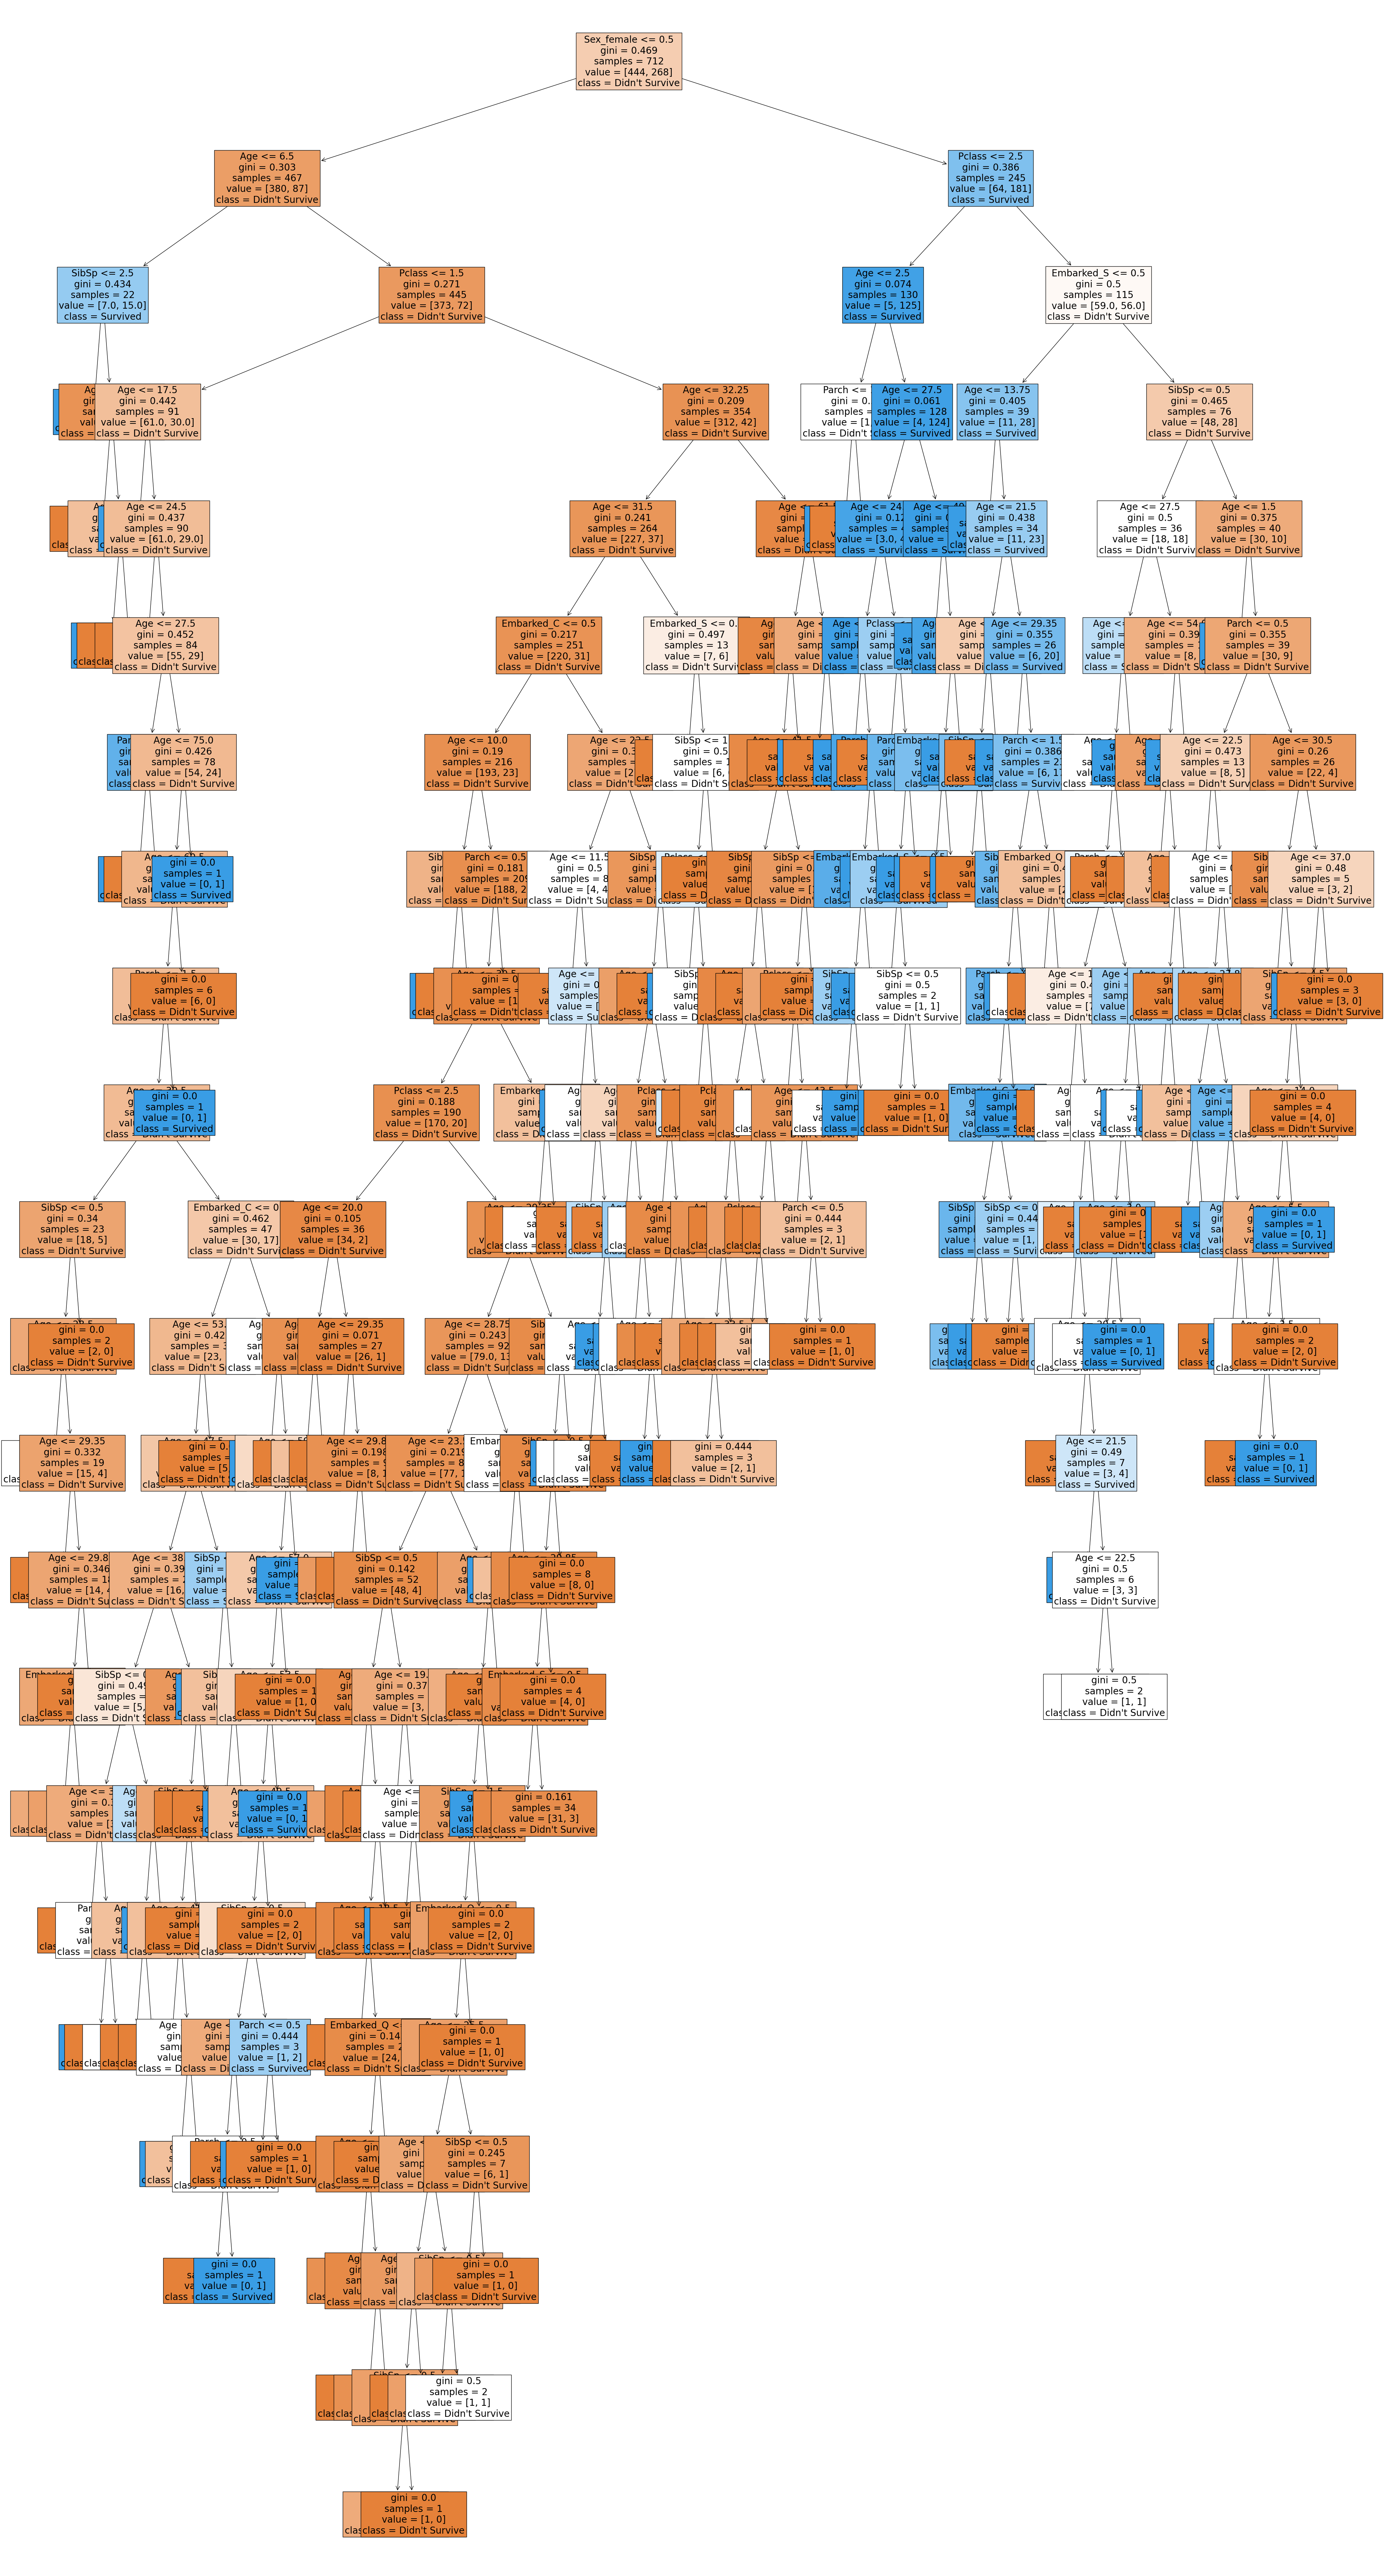

In [208]:
plt.figure(figsize=(50,100))
features= X.columns
classes =["Didn't Survive", "Survived"]
tree.plot_tree(unpruned, feature_names=features, class_names= classes, filled=True, fontsize=20)
plt.show()

In [209]:
X_train,X_dev,y_train,y_dev= train_test_split(X_train,y_train, test_size=0.5, random_state=42)
X_dev

Pclass        Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C  \
373       1  22.000000      0      0       False      True        True   
848       2  28.000000      0      1       False      True       False   
593       3  29.699118      0      2        True     False       False   
237       2   8.000000      0      2        True     False       False   
36        3  29.699118      0      0       False      True        True   
..      ...        ...    ...    ...         ...       ...         ...   
488       3  30.000000      0      0       False      True       False   
519       3  32.000000      0      0       False      True       False   
369       1  24.000000      0      0        True     False        True   
313       3  28.000000      0      0       False      True       False   
731       3  11.000000      0      0       False      True        True   

     Embarked_Q  Embarked_S  
373       False       False  
848       False        True  
593        True       False  
237       False        True  
36        False       False  
..          ...         ...  
488       False        True  
519       False        True  
369       False       False  
313       False        True  
731       False       False  

[356 rows x 9 columns]

In [210]:
ydevpred= unpruned.predict(X_dev)
ytestpred= unpruned.predict(X_test)
print(f'development accuracy= {accuracy_score(y_dev, ydevpred)}')

development accuracy= 0.9297752808988764


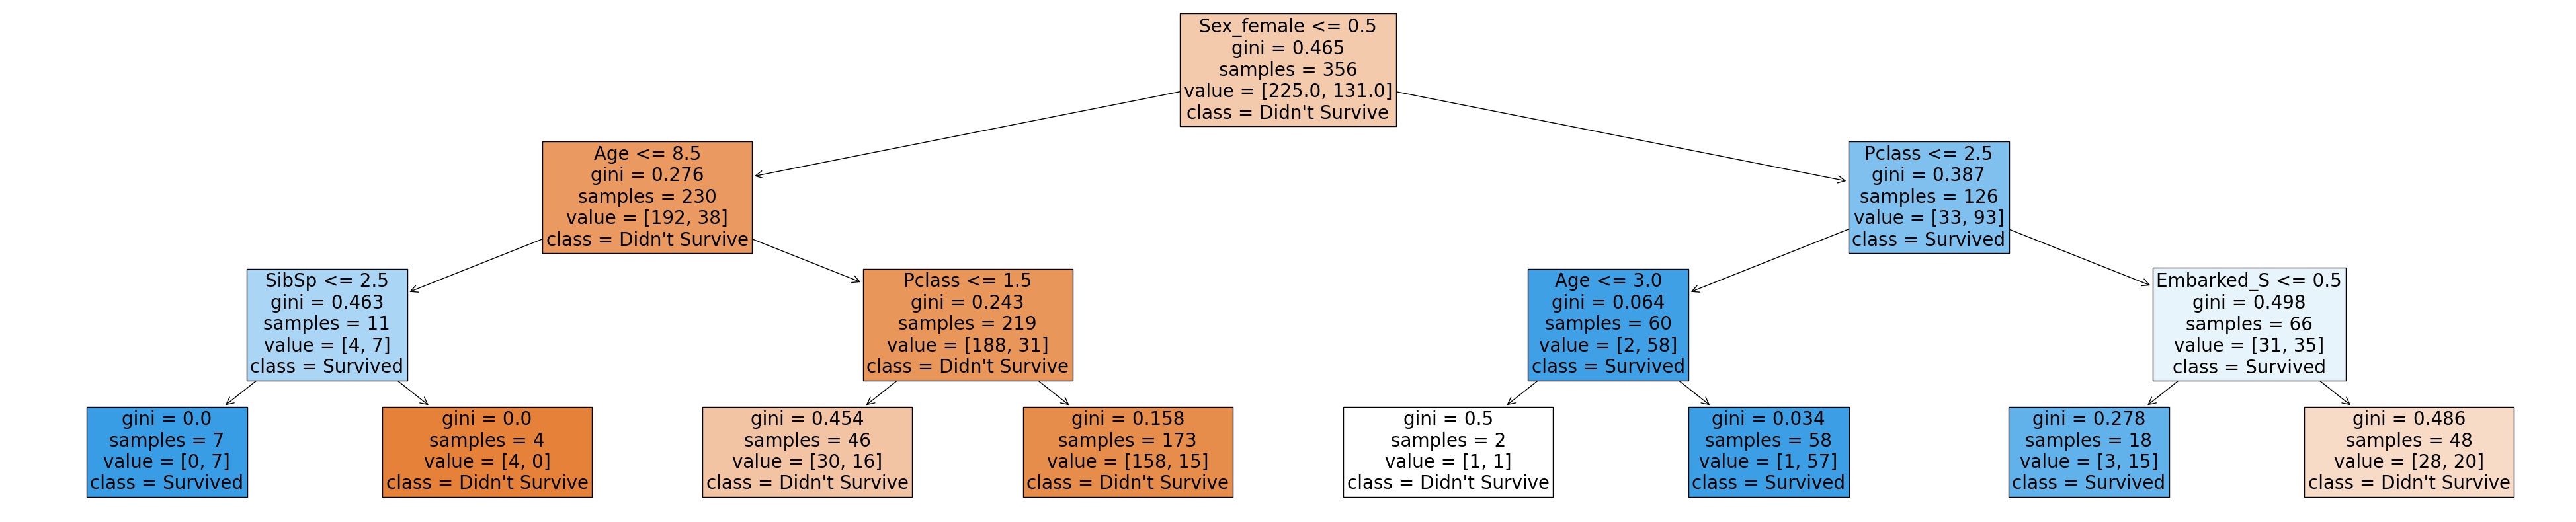

In [211]:
unpruned= DecisionTreeClassifier(max_depth= 3, random_state=42)
unpruned.fit(X_train,y_train)

plt.figure(figsize=(50,10))
features= X.columns
classes =["Didn't Survive", "Survived"]
tree.plot_tree(unpruned, feature_names=features, class_names= classes, filled=True, fontsize=20)
plt.show()

In [212]:
ydevpred= unpruned.predict(X_dev)
ytestpred= unpruned.predict(X_test)
print(f'development accuracy= {accuracy_score(y_dev, ydevpred)}')

development accuracy= 0.8286516853932584


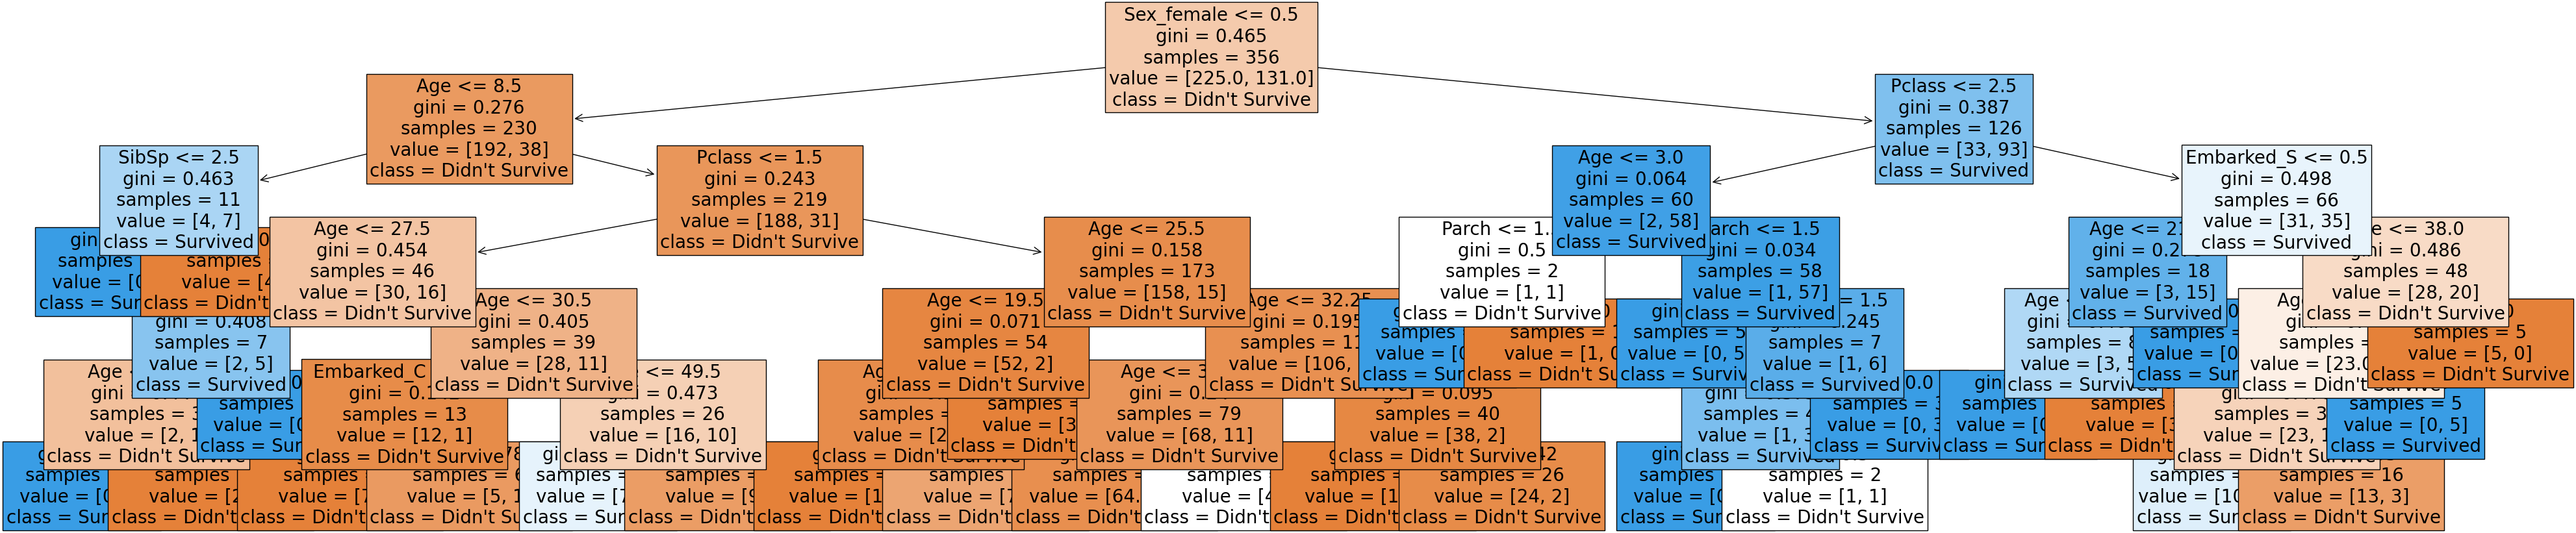

In [213]:
unpruned= DecisionTreeClassifier(max_depth= 6, random_state=42)
unpruned.fit(X_train,y_train)

plt.figure(figsize=(50,10))
features= X.columns
classes =["Didn't Survive", "Survived"]
tree.plot_tree(unpruned, feature_names=features, class_names= classes, filled=True, fontsize=20)
plt.show()

In [214]:
ydevpred= unpruned.predict(X_dev)
ytestpred= unpruned.predict(X_test)
print(f'development accuracy= {accuracy_score(y_dev, ydevpred)}')

development accuracy= 0.7865168539325843


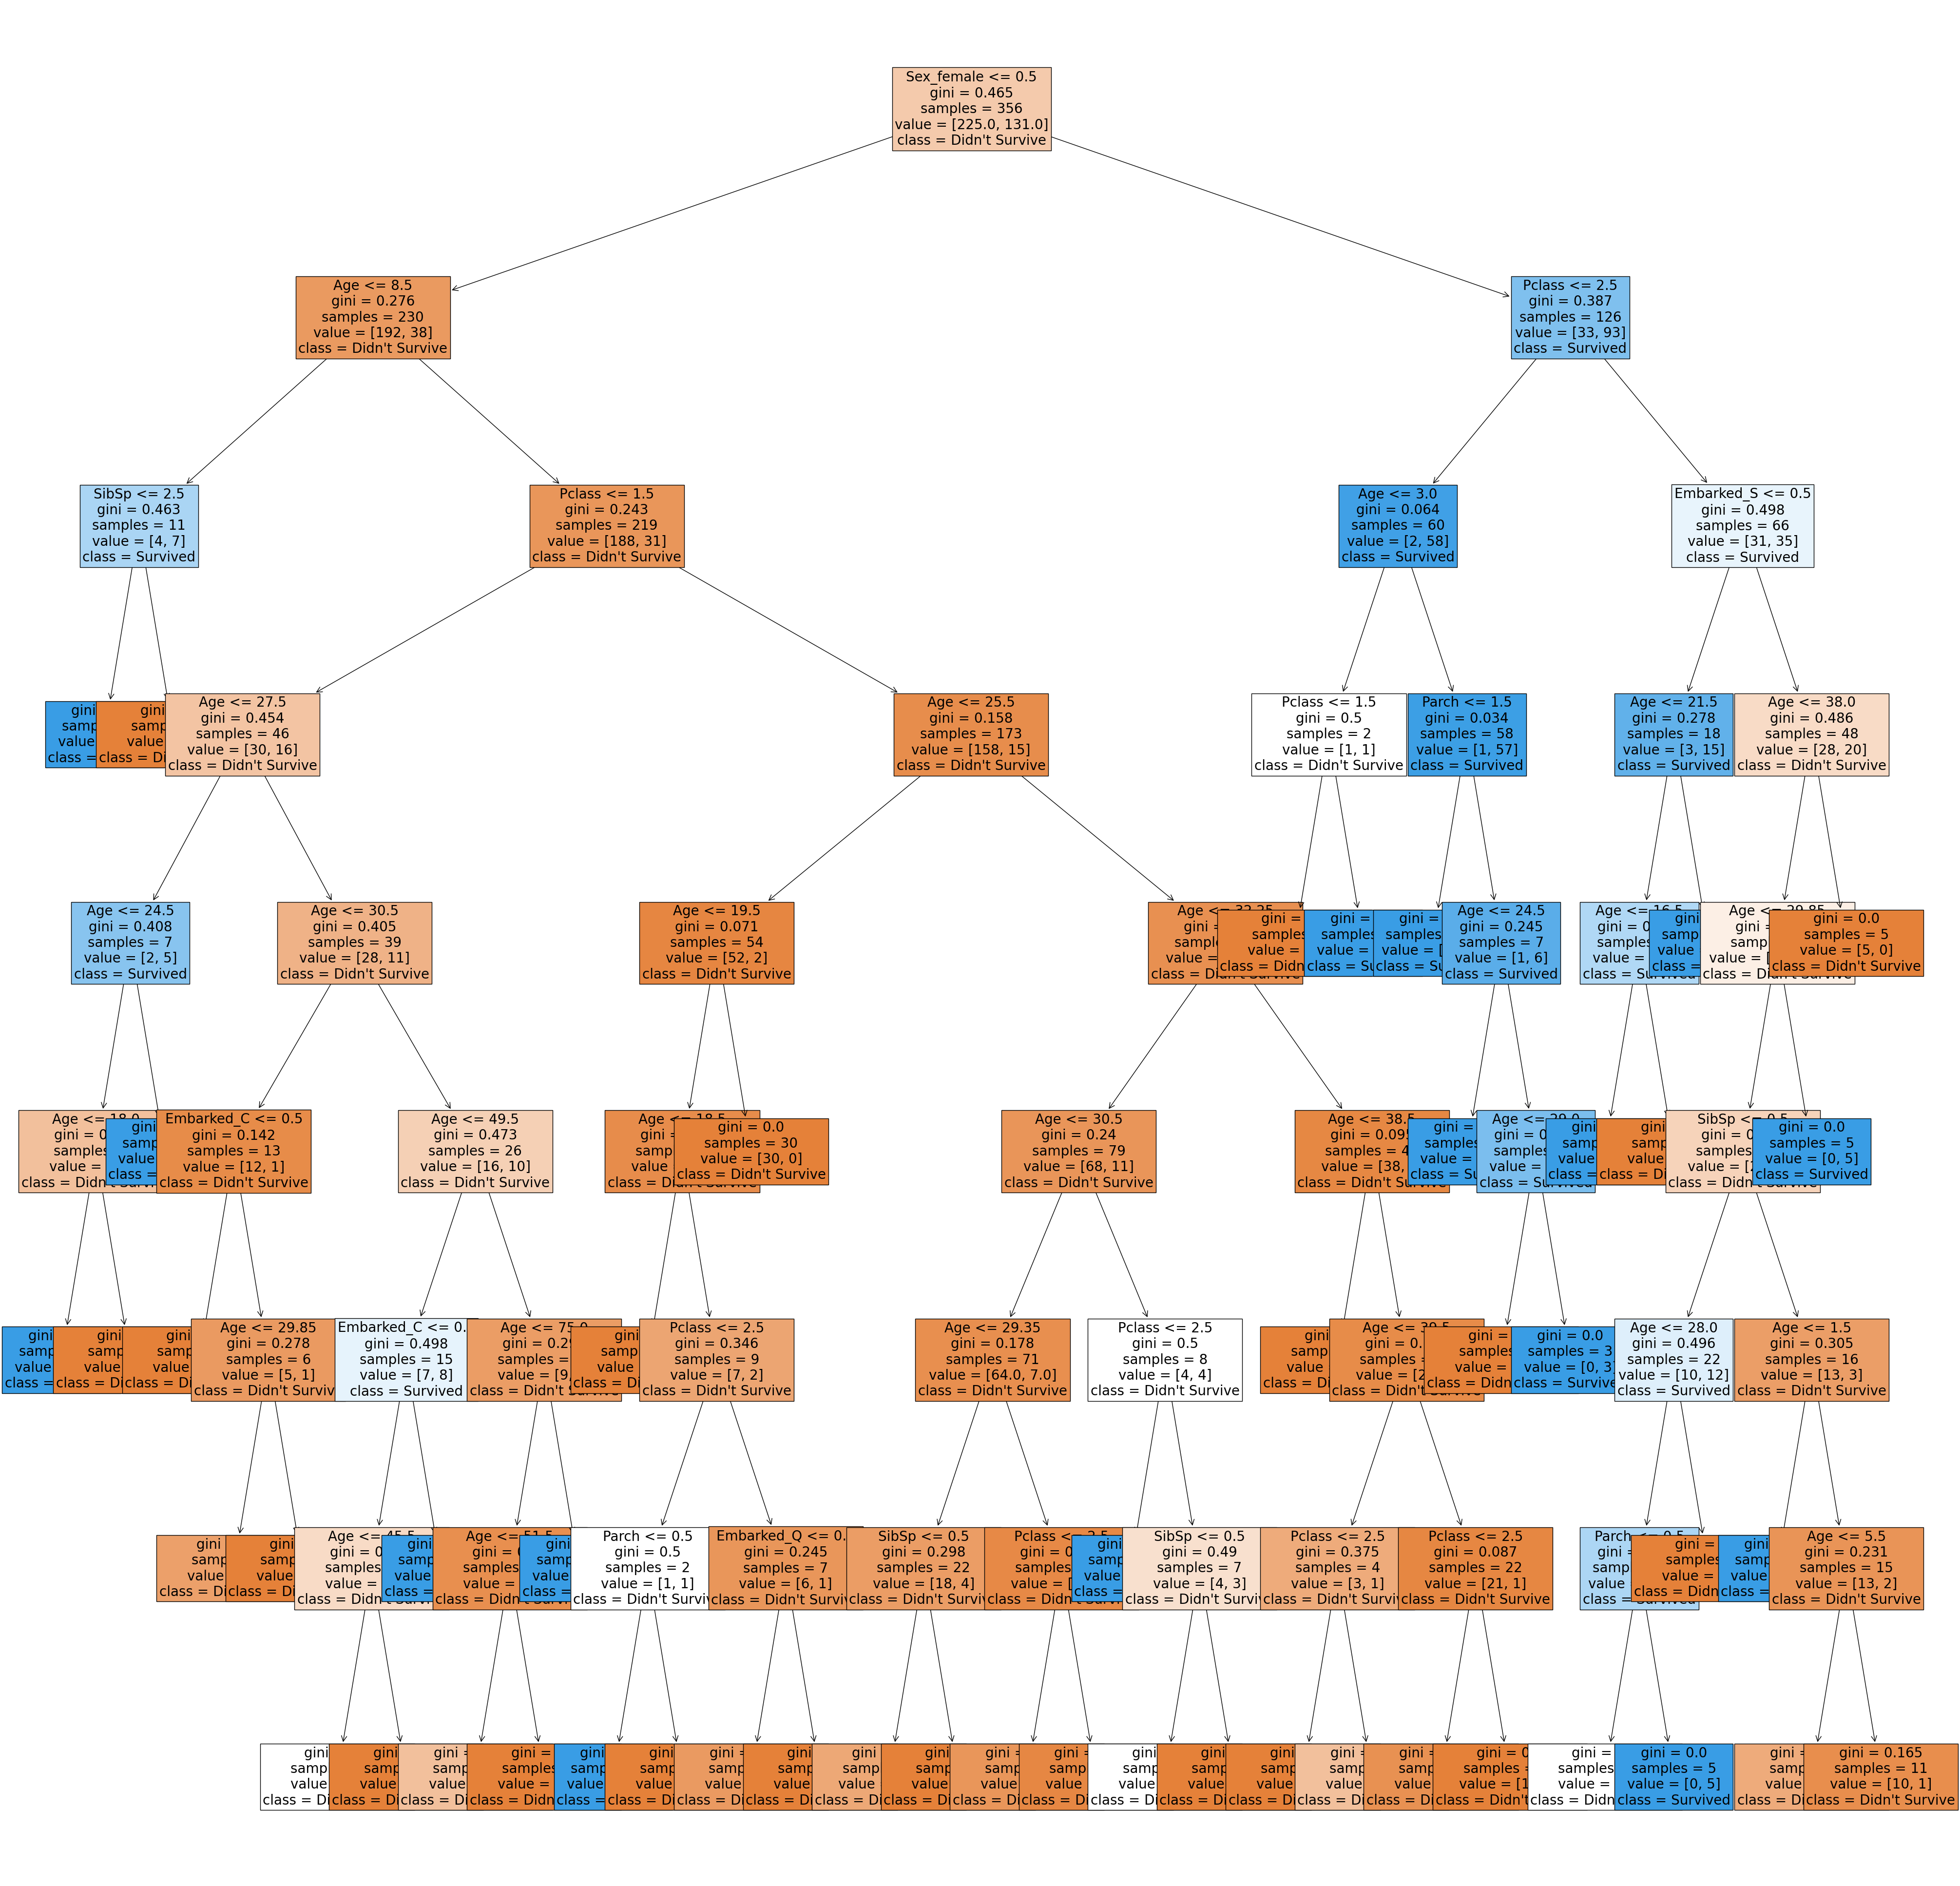

In [215]:
unpruned= DecisionTreeClassifier(max_depth= 8, random_state=42)
unpruned.fit(X_train,y_train)

plt.figure(figsize=(50,50))
features= X.columns
classes =["Didn't Survive", "Survived"]
tree.plot_tree(unpruned, feature_names=features, class_names= classes, filled=True, fontsize=20)
plt.show()

In [216]:
ydevpred= unpruned.predict(X_dev)
ytestpred= unpruned.predict(X_test)
print(f'development accuracy= {accuracy_score(y_dev, ydevpred)}')

development accuracy= 0.800561797752809


<Axes: >

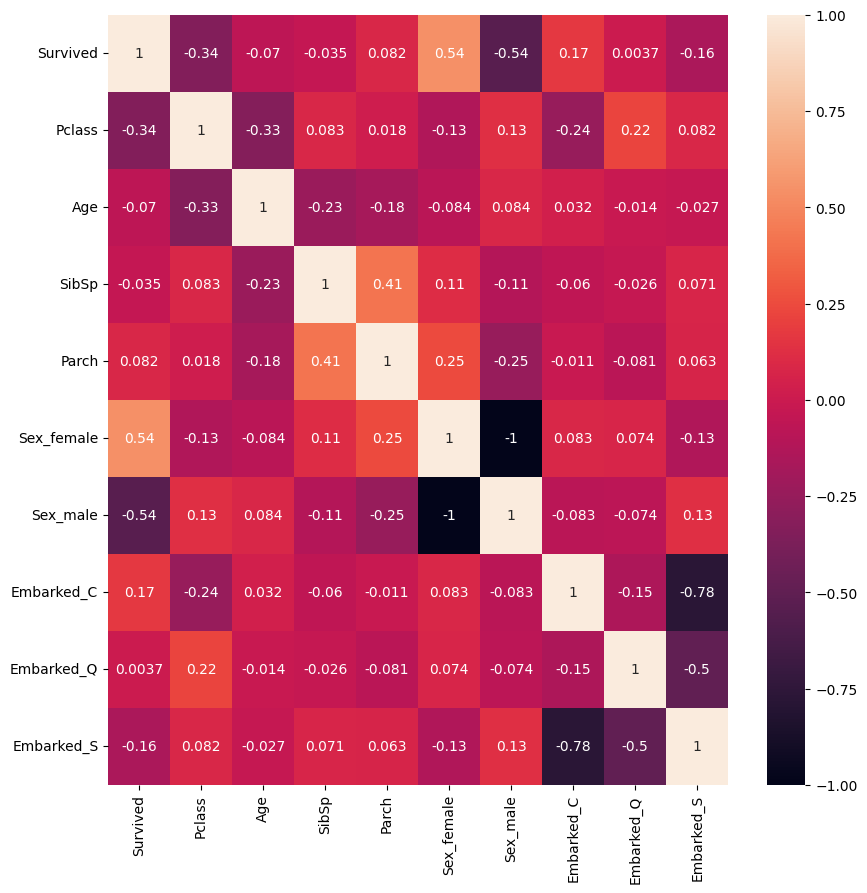

In [217]:
plt.figure(figsize= (10, 10))
sns.heatmap(titanic_df.corr(), annot= True)

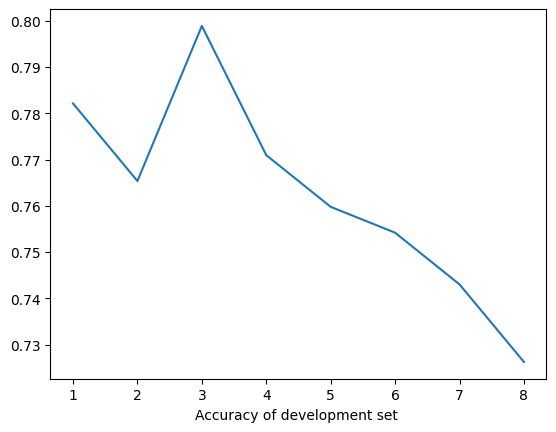

In [218]:
# plotting  accuracies
depths= range(1,unpruned.tree_.max_depth+1)

pruned= []
for a in depths:
    tc= DecisionTreeClassifier(max_depth= a, random_state=1)
    tc.fit(X_dev,y_dev)
    score=tc.score(X_test,y_test)
    pruned.append(score)
fig,ax= plt.subplots()
ax.plot(depths,pruned)
plt.xlabel("Accuracy of development set ")
ax.xaxis.set_ticks(depths)
plt.show()

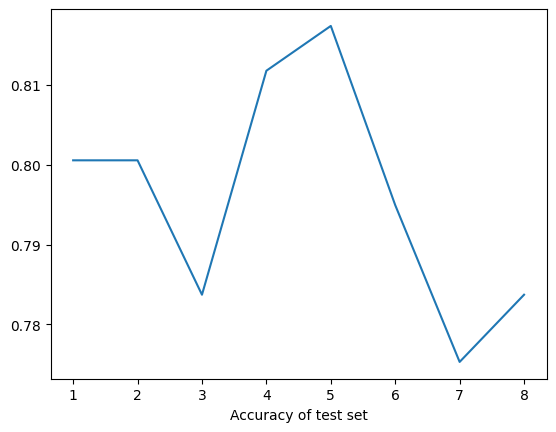

In [219]:
# plotting  accuracies
depths= range(1,unpruned.tree_.max_depth+1)

pruned= []
for a in depths:
    tc= DecisionTreeClassifier(max_depth= a, random_state=1)
    tc.fit(X_test,y_test)
    score=tc.score(X_train,y_train)
    pruned.append(score)
fig,ax= plt.subplots()
ax.plot(depths,pruned)
plt.xlabel("Accuracy of test set")
ax.xaxis.set_ticks(depths)
plt.show()

In [220]:
ydevpred= unpruned.predict(X_dev)
ytestpred= unpruned.predict(X_test)
print(f'testing accuracy= {accuracy_score(y_test, ytestpred)}')

testing accuracy= 0.8100558659217877


Random Forests

In [221]:

from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [222]:
forest= RandomForestClassifier(random_state=42)

parameters= {
    'min_samples_leaf': [10,20,30,40,50],
    'n_estimators': [20,50,80,110,140],
    'max_features': [1,2,3,4,5]
}

gridsearch= GridSearchCV(estimator=forest,
                         param_grid=parameters,
                         cv= 5,
                         n_jobs=-1,verbose=1,scoring='r2'
                          )
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


In [ ]:
bestestimator= gridsearch.best_estimator_
bestestimator

In [ ]:
print(gridsearch.best_params_)

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(bestestimator[4], X.columns,class_names= ['Survived','Not Survived'], filled= True)
plt.show()

In [ ]:
random_state= 42
base= DecisionTreeClassifier(max_depth= None, random_state=42)
ensemble= BaggingClassifier(estimator= base, n_estimators=100, random_state=42)
forest= RandomForestClassifier(random_state=42)
forest_hp= RandomForestClassifier(max_depth=10,min_samples_leaf= 5, n_estimators=120,random_state=42)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
forest.fit(X_train,y_train)
forest_hp.fit(X_train,y_train)

ytestpred_base=base.predict(X_test)
ytestpred_ensemble=ensemble.predict(X_test)
ytestpred_forest=forest.predict(X_test)
ytestpred_forest_hp=forest_hp.predict(X_test)


print(f'testing accuracy= {accuracy_score(y_test, ytestpred_base)}')
print(f'testing accuracy= {accuracy_score(y_test, ytestpred_ensemble)}')
print(f'testing accuracy= {accuracy_score(y_test, ytestpred_forest)}')
print(f'testing accuracy= {accuracy_score(y_test, ytestpred_forest_hp)}')



In [ ]:
plt.figure(figsize=(40,20))
plot_tree(bestestimator[4], X.columns,class_names= ['Survived','Not Survived'], filled= True)
plt.show()

KeyboardInterrupt: 

In [ ]:
X=titanic_df.drop('Survived', axis =1)
y= titanic_df['Survived']

In [ ]:
featurenames= X.columns
featurenames

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

In [ ]:
# importances
importances= forest.feature_importances_
feature_importance= pd.DataFrame({'feature':featurenames,'Gini Importance': importances}).sort_values('Gini Importance',ascending=False)
feature_importance

In [ ]:
sns.barplot(x=feature_importance['Gini Importance'], y= feature_importance['feature'],data= feature_importance)

In [ ]:
# drop least important
X_train_gini= X_train.drop(['Embarked_Q'], axis=1)
X_test_gini= X_test.drop(['Embarked_Q'], axis=1)

random_state= 42
forestgini= RandomForestClassifier(random_state)
forestgini.fit(X_train_gini,y_train)

ytestpredforestgini= forestgini.predict(X_test_gini)
print(accuracy_score(y_test,ytestpred_forest))
print(accuracy_score(y_test,ytestpredforestgini))